In [1]:
import numpy as np
import pygad
import tree_representation
import csv

/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:48: RuntimeWarning: overflow encountered in power
  return self.left_child.evaluate(x) ** self.right_child.evaluate(x)
/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:48: RuntimeWarning: invalid value encountered in power
  return self.left_child.evaluate(x) ** self.right_child.evaluate(x)
/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:48: RuntimeWarning: divide by zero encountered in power
  return self.left_child.evaluate(x) ** self.right_child.evaluate(x)
/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:46: RuntimeWarning: divide by zero encountered in divide
  return self.left_child.evaluate(x) / self.right_child.evaluate(x)
/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:44: RuntimeWarning: invalid value encountered in multiply
  re

Best solution ^ - / + x + + -2.00 9.00 - / 4.00 - / + x + 6.00 - / 9.00 - 6.00 - * 4.00 -2.00 - - / x 9.00 - x 3.00 + -4.00 -2.00 - 9.00 + -2.00 -4.00 9.00 -1.00 - - / x 9.00 - x -7.00 + -2.00 -4.00 - -1.00 -7.00 - -1.00 9.00 + -2.00 9.00
Best fitness -5.158746222934435e+21


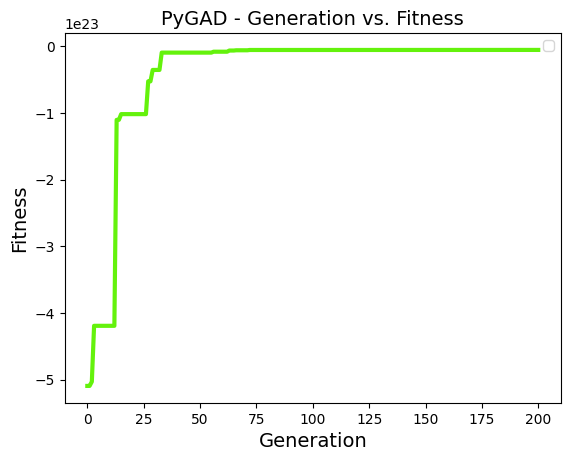

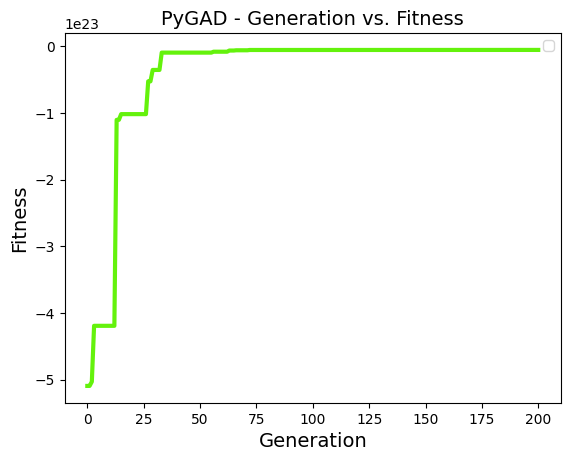

In [2]:
equation_index = 40

with open("dataset.csv") as file:
    reader = csv.reader(file)

    d = 0
    for row in reader:
        xs = np.fromstring(row[1][1:-1], sep=", ")
        ys = np.fromstring(row[2][1:-1], sep=", ")
        if d == equation_index:
           break
        d += 1

def fitness_func(ga_instance, solution, solution_idx):
  tree = tree_representation.fromIntArray(solution)
  fit = tree_representation.fitness(tree, xs, ys)
  # TODO: dirty hack (why is fitness > 0 sometimes??)
  return fit if fit <= 0 else -fit


initial_population = [tree_representation.toIntArray(tree_representation.generate_random_tree(0.3)) for _ in range(300)]


def crossover_func(parents, offspring_size, ga_instance):
  
  # print("CROSSOVER")
  
  offspring = []
  
  t1, t2 = tree_representation.fromIntArray(parents[0]), tree_representation.fromIntArray(parents[1])
  # print("parents: ")
  # print(t1)
  # print(t2)
  
  # print("offspring: ")

  while len(offspring) != offspring_size[0]:
    child, _ = tree_representation.crossover_tree(t1, t2)
    try:
      offspring.append(tree_representation.toIntArray(child))
    except IndexError:
      print("Not crossovering")
    
    # print(child)
  return np.array(offspring)


def mutation_func(offspring, ga_instance):
  
    # print("MUTATION")
  
    new_offspring = []

    for t_numerical in offspring:
      t = tree_representation.fromIntArray(t_numerical)
      
      if(np.random.rand() < ga_instance.mutation_probability):
      
        # print("before: ")
        # print(t)
      
        t = tree_representation.mutate_tree(t)
        
        # print("after: ")
        # print(t)
      
      new_offspring.append(tree_representation.toIntArray(t))

    return np.array(new_offspring)


ga_instance = pygad.GA(num_generations=200,
                       num_parents_mating=2,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       keep_elitism=10,
                       crossover_type=crossover_func,
                       mutation_type=mutation_func,
                       gene_type=np.int8,
                       mutation_probability=0.5,
                       )

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("Best solution", tree_representation.fromIntArray(solution))
print("Best fitness", solution_fitness)

ga_instance.plot_fitness()